# Data Mining Final Project : Music Miner

In [1]:
# Package Installation
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,silhouette_score, accuracy_score, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import r2_score 
from pandas_profiling import ProfileReport
import time
from sklearn.naive_bayes import GaussianNB
from yellowbrick.features import RadViz
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from yellowbrick.datasets import load_credit
from yellowbrick.datasets import load_hobbies
from sklearn.datasets import make_blobs
from yellowbrick.cluster import SilhouetteVisualizer
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
plt.style.use('seaborn-white')

## Introduction: Data and Problem summary

The music industry has a well-developed market with global annual revenue of around $15 billion. The recording industry is highly competitive and is dominated by three big production companies which make up nearly 82\% of the total annual album sales. In this project, we are trying to explore whether there are any country-specific music preferences for popular songs in Spotify.

This dataset includes the top songs by country by spotify in 2019. This dataset has several variables about the songs and is based on Billboard. The extraction was done at Christmas time, so the most played songs should be related to Christmas. There are 13 attributes of these songs to be explored, including title, artist, top genre, time added, etc.

url: https://www.kaggle.com/leonardopena/top-50-spotify-songs-by-each-country

## Exploratory Data Analysis

### Variable description
title: Song's title    
artist: Song's artist  
top genre: The genre of the track  
year: Song's year	
bpm: Beats.Per.Minute - The tempo of the song	
nrgy: Energy- The energy of a song - the higher the value, the more energtic.	
dnce: Danceability - The higher the value, the easier it is to dance to this song.	
dB: Loudness..dB.. - The higher the value, the louder the song	
live: Liveness - The higher the value, the more likely the song is a live recording	
val: Valence - The higher the value, the more positive mood for the song.	
dur: Length - The duration of the song.	
acous: Acousticness.. - The higher the value the more acoustic the song is.  
spch: Speechiness - The higher the value the more spoken word the song contains.	
pop: Popularity- The higher the value the more popular the song is.	
country: Country where the song was famous

In [2]:
#Data Cleaning
df = pd.read_csv('top50contry.csv',index_col= 0,encoding = 'iso-8859-1')
data = df.dropna() #Drop Column with null
data = data.drop('added', axis = 1) #Column 'added' has only one distinct value. 
data.reset_index(drop= True, inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      984 non-null    object 
 1   artist     984 non-null    object 
 2   top genre  984 non-null    object 
 3   year       984 non-null    int64  
 4   bpm        984 non-null    float64
 5   nrgy       984 non-null    float64
 6   dnce       984 non-null    float64
 7   dB         984 non-null    float64
 8   live       984 non-null    float64
 9   val        984 non-null    float64
 10  dur        984 non-null    int64  
 11  acous      984 non-null    float64
 12  spch       984 non-null    float64
 13  pop        984 non-null    int64  
 14  country    984 non-null    object 
dtypes: float64(8), int64(3), object(4)
memory usage: 115.4+ KB


In [3]:
data.head(5)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,country
0,Dance Monkey,Tones and I,australian pop,2019,98.0,59.0,82.0,-6.0,15.0,51.0,209,69.0,9.0,100,world
1,ROXANNE,Arizona Zervas,pop rap,2019,117.0,60.0,62.0,-6.0,46.0,46.0,164,5.0,15.0,99,world
2,Memories,Maroon 5,pop,2019,91.0,32.0,76.0,-7.0,8.0,57.0,189,84.0,5.0,99,world
3,Circles,Post Malone,dfw rap,2019,120.0,76.0,70.0,-3.0,9.0,55.0,215,19.0,4.0,99,world
4,All I Want for Christmas Is You,Mariah Carey,dance pop,1994,150.0,63.0,34.0,-7.0,7.0,35.0,241,16.0,4.0,98,world


In [4]:
print('There are',len(data['country'].unique()),'countries in the dataset. We will get generate several regions.')
data['country'].unique()

There are 20 countries in the dataset. We will get generate several regions.


array(['world', 'africa', 'argentina', 'australia', 'belgium', 'bolivia',
       'brazil', 'canada', 'germany', 'colombia', 'chile', 'spain', 'usa',
       'france', 'india', 'indonesia', 'israel', 'italy', 'japan',
       'malasya'], dtype=object)

### Distribution for different variables

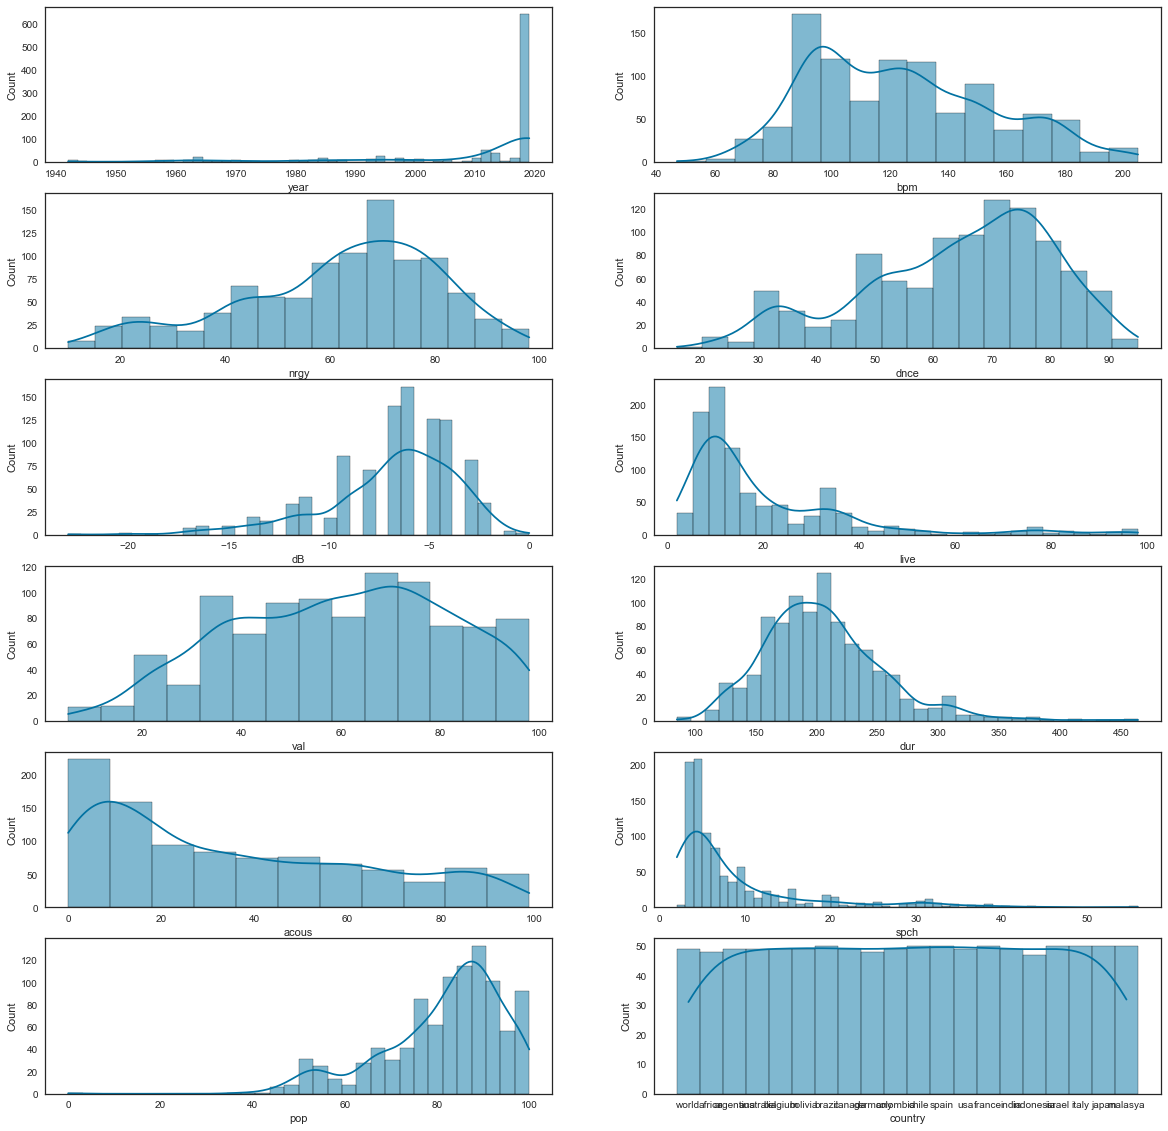

In [5]:
#1 Distribution for different variables
data_quant = data.drop(['title', 'artist','top genre'], axis = 1)
#print(data_quant.head())
fig, axes = plt.subplots(6,2, figsize = (20, 20))
for i in range(0,12):
    title = data_quant.columns.tolist()
    sns.histplot(data = data_quant.iloc[:,i], ax = axes[i//2, i%2], kde = True)

### Correlation between quantitive variables

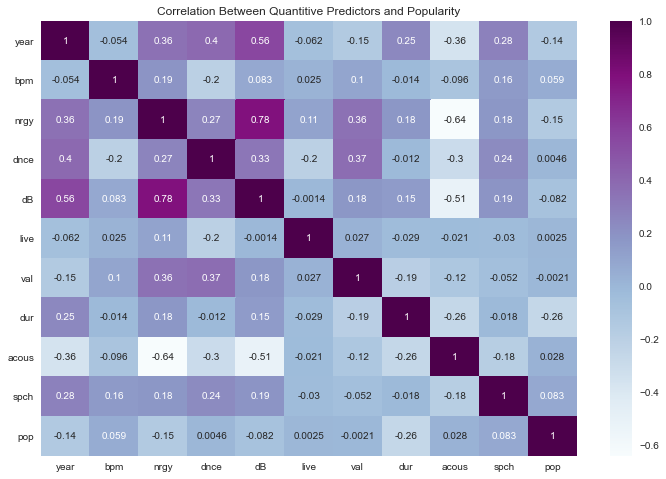

In [6]:
#2 Correlation between quantitive variables
data_quant = data.drop(['title', 'artist','top genre', 'country'], axis = 1)
fig, ax = plt.subplots()
sns.heatmap(data_quant.corr(), ax = ax,  annot = True, cmap="BuPu")
ax.set_title('Correlation Between Quantitive Predictors and Popularity')
fig.set_size_inches(12, 8)

### Predictors for different countries

Text(0.5, 1.0, 'BPM in different countries')

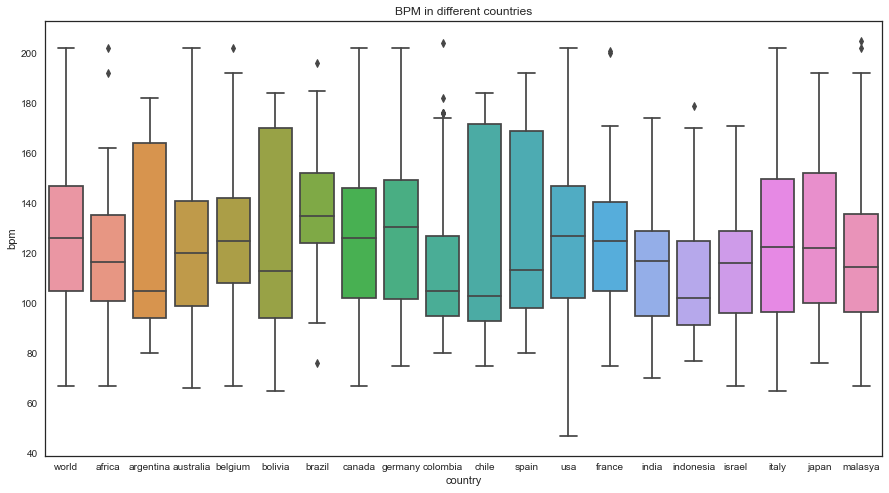

In [7]:
#3 Predictors for different countries
fig, ax1 = plt.subplots(figsize = (15,8))
#fig, (ax1,ax2) = plt.subplots(figsize = (20,15))
sns.boxplot(ax = ax1, x = 'country', y = 'bpm', data = data)
ax1.set_title('BPM in different countries')

#sns.boxplot(ax = ax2, y = 'country', x = 'nrgy', data = data)
#ax2.set_title('Energy in different countries')

#sns.boxplot(ax = ax3, x = 'country', y = 'dur', data = data)
#ax3.set_title('Duration in different countries')

### Most popular genre and artist

[(80.0, 100.0)]

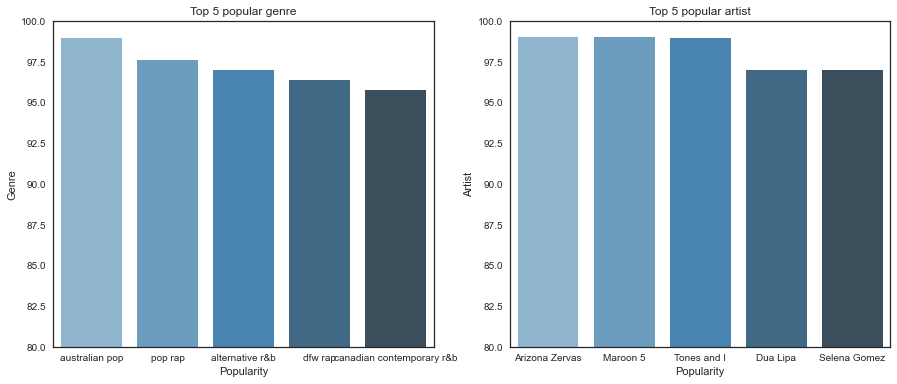

In [8]:
#4 Popularity by top genre 
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,6))
s1 = data.groupby(by = ['top genre']).mean()
top_5 = s1.nlargest(5,'pop')
sns.barplot(x = top_5.index, y = 'pop', data = top_5, ax = ax1, palette="Blues_d")
ax1.set_title('Top 5 popular genre')
ax1.set_xlabel('Popularity')
ax1.set_ylabel('Genre')
ax1.set(ylim=(80, 100))

#5 Popularity by artist
s2 = data.groupby(by = ['artist']).mean()
top_5 = s2.nlargest(5,'pop')
sns.barplot(x = top_5.index, y = 'pop', data = top_5, ax = ax2, palette="Blues_d")
ax2.set_title('Top 5 popular artist')
ax2.set_xlabel('Popularity')
ax2.set_ylabel('Artist')
ax2.set(ylim=(80, 100))

## Model Building

In [9]:
#Data Cleaning
df = pd.read_csv('top50contry.csv',index_col= 0,encoding = 'iso-8859-1')
data = df.dropna() #Drop Column with null
data = data.drop('added', axis = 1) #Column 'added' has only one distinct value. 
data.reset_index(drop= True, inplace= True)
data.head(5)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,country
0,Dance Monkey,Tones and I,australian pop,2019,98.0,59.0,82.0,-6.0,15.0,51.0,209,69.0,9.0,100,world
1,ROXANNE,Arizona Zervas,pop rap,2019,117.0,60.0,62.0,-6.0,46.0,46.0,164,5.0,15.0,99,world
2,Memories,Maroon 5,pop,2019,91.0,32.0,76.0,-7.0,8.0,57.0,189,84.0,5.0,99,world
3,Circles,Post Malone,dfw rap,2019,120.0,76.0,70.0,-3.0,9.0,55.0,215,19.0,4.0,99,world
4,All I Want for Christmas Is You,Mariah Carey,dance pop,1994,150.0,63.0,34.0,-7.0,7.0,35.0,241,16.0,4.0,98,world


### An inituitive idea would be classification based on countries. However, classification with countries comes with a poor accuracy.

In [10]:
#Classification by country
X = data[data['country'] != 'world'].drop(['title', 'artist','top genre', 'country','year'], axis = 1)
y = data[data['country'] != 'world']['country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

#Naive Bayes classifier 
model = GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
#print the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      africa       0.11      0.08      0.09        13
   argentina       0.17      0.29      0.22        17
   australia       0.20      0.20      0.20        15
     belgium       0.00      0.00      0.00        14
     bolivia       0.08      0.14      0.10        14
      brazil       0.50      0.83      0.62        12
      canada       0.08      0.20      0.11        15
       chile       0.50      0.08      0.14        12
    colombia       0.25      0.42      0.31        12
      france       0.33      0.23      0.27        13
     germany       0.00      0.00      0.00        12
       india       0.30      0.19      0.23        16
   indonesia       0.24      0.36      0.29        14
      israel       0.75      0.29      0.41        21
       italy       0.00      0.00      0.00        13
       japan       0.55      0.63      0.59        19
     malasya       0.16      0.27      0.20        15
       spain       0.12    

#### The result showed a relatively low accuracy. However, we may find some countries with a high precision: Brazil, Israel, Chile and Japan. 

#### A possible reason is that there are too many classification categories in the result. Since accuracy is defined as TP+TN/TP+FP+FN+TN, a large denominator would lead to a low accuracy. On the other hand, precision is defnied as TP/TP+FP. Therfore, it might be possible for some countries to have a low precision.

### Let's choose the countries with high precision to do the classification again. We select Brazil, Israel and Japan and use Naive Bayes to conduct the classification

              precision    recall  f1-score   support

      brazil       0.87      0.93      0.90        14
      israel       0.86      0.67      0.75        18
       japan       0.75      0.92      0.83        13

    accuracy                           0.82        45
   macro avg       0.82      0.84      0.82        45
weighted avg       0.83      0.82      0.82        45



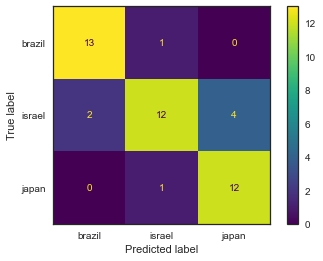

In [11]:
#Only select three countries: Japan, chile and columbia
data1 = data[(data["country"] == 'japan') | (data["country"] == 'israel')| (data["country"] == 'brazil')]
#Classification by country
X1 = data1.drop(['title', 'artist','top genre', 'country','year'], axis = 1)
y1 = data1['country']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state = 1)
#KNN classifier
neigh = GaussianNB()
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)
#precision
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()
print(classification_report(y_test, y_predict))

#### The accuracy has increased largely based on the new dataset!

### We could do a clustering to verify our choice.  First, group the orginal dataset by countries and calculate the mean of each property. Therefore we could know what a popular song in certain countries looks like.

In [12]:
# Dataset Rebuilding
data_clu = data[data['country'] != 'world'].drop(['title', 'artist','top genre','pop','year'], axis = 1)
data_clu.head(5)

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,country
49,98.0,59.0,82.0,-6.0,15.0,51.0,209,69.0,9.0,africa
50,120.0,76.0,70.0,-3.0,9.0,55.0,215,19.0,4.0,africa
51,91.0,32.0,76.0,-7.0,8.0,57.0,189,84.0,5.0,africa
52,117.0,60.0,62.0,-6.0,46.0,46.0,164,5.0,15.0,africa
53,150.0,63.0,34.0,-7.0,7.0,35.0,241,16.0,4.0,africa


In [13]:
# Groupby
data_gb = data_clu.groupby(by = 'country').mean()
data_gb.head(5)

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
country,,,,,,,,,
africa,120.312500,53.979167,62.750000,-9.125000,18.250000,60.187500,227.291667,40.479167,5.583333
argentina,123.775510,73.591837,73.551020,-4.367347,17.693878,68.530612,224.183673,20.612245,11.346939
australia,122.469388,54.816327,56.877551,-8.428571,19.244898,63.530612,187.877551,44.551020,5.061224
belgium,125.755102,55.653061,58.326531,-8.367347,21.571429,62.897959,190.102041,44.204082,5.714286
bolivia,128.897959,69.040816,73.408163,-4.836735,14.795918,68.183673,226.673469,22.836735,14.836735


### Then we do a KMeans clustering for countries based on songs' properties. Since we select three typical countries above, let's set n_cluster = 3 to see the result.

In [14]:
model_tuned = KMeans(random_state=1, n_clusters=3).fit(data_gb)
country_clu = pd.DataFrame(data = model_tuned.labels_, columns = ['Clustering'], index = data_gb.index)
print(country_clu[country_clu['Clustering'] == 0].T)
print(country_clu[country_clu['Clustering'] == 1].T)
print(country_clu[country_clu['Clustering'] == 2].T)

country     africa  india  indonesia  israel  malasya
Clustering       0      0          0       0        0
country     argentina  bolivia  chile  colombia  japan  spain
Clustering          1        1      1         1      1      1
country     australia  belgium  brazil  canada  france  germany  italy  usa
Clustering          2        2       2       2       2        2      2    2


#### As we can see, Israel, Japan and Brazil are in three different clusters. Each represents a unique clustering. Therefore, we could focus on these three countries to discover countrywise features.

### We take two approach to discover countrywise features: PCA and Feature Selection.  

For PCA we select two principal components and visualize their loadings. 

For feature selection we use linear regression model and forward sequential selection. Let's start with Japan. 

### PCA and Feature Selection for popular songs in Japan

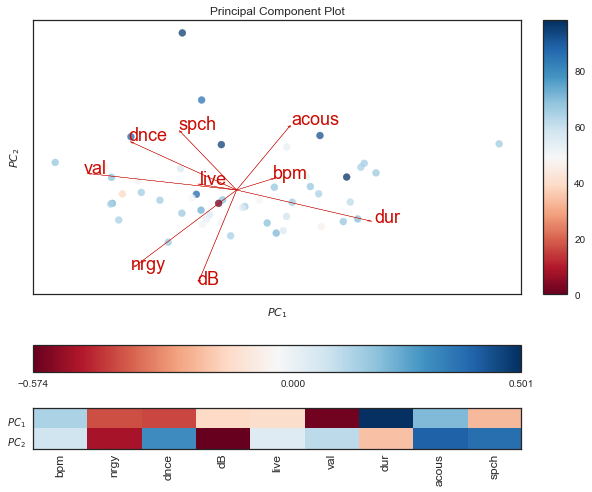

Features selected by forward sequential selection for Japan: ['nrgy' 'val' 'spch']


In [15]:
#Look into Japan by PCA
from yellowbrick.features import PCA
data_PCA = data[data["country"] == 'japan']
X2 = data_PCA.drop(['title', 'artist','top genre','country','pop', 'year'], axis = 1)
y2 = data_PCA['pop']

visualizer = PCA(scale=True, proj_features=True, size=(600, 500), heatmap = True)
visualizer.fit_transform(X2,y2)
for label in visualizer.ax.texts:
    label.set_size(18)
visualizer.show()

from sklearn.feature_selection import SequentialFeatureSelector
model= LinearRegression()
features_selected = 3
k = 10
sfs = SequentialFeatureSelector(model, 
                               n_features_to_select = features_selected, 
                               direction="forward",
                               scoring='neg_mean_squared_error',
                               cv= k) 
sfs = sfs.fit(X2,y2)
feature_names= X2.columns.values
print("Features selected by forward sequential selection for Japan: "+str(feature_names[sfs.get_support()]))

#### In these results, first principal component has large positive associations with val and dur, so this component primarily measures emotional-related characterstics. The second component has large positive associations with dB and energy, so this component primarily measures the loudness of a song. 

#### As for the feature selection, it selects energy, val and spch, which validates the result of PCA. To sum up, if you want to create a popular song in Japan, focus on its emotional appeal and loudness. 

### PCA and Feature Selection for popular songs in Israel.

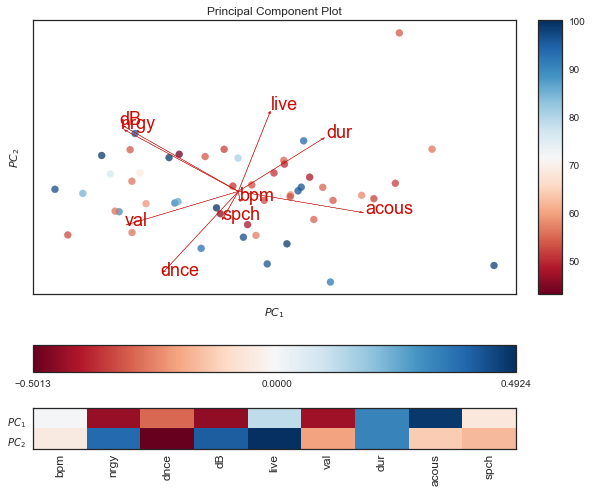

Features selected by forward sequential selection for Israel: ['nrgy' 'dur' 'spch']


In [16]:
#Look into israel by PCA
from yellowbrick.features import PCA
data_PCA = data[data["country"] == 'israel']
X2 = data_PCA.drop(['title', 'artist','top genre','country','pop', 'year'], axis = 1)
y2 = data_PCA['pop']

visualizer = PCA(scale=True, proj_features=True, size=(600, 500), heatmap = True)
visualizer.fit_transform(X2, y2)
for label in visualizer.ax.texts:
    label.set_size(18)
visualizer.show()

from sklearn.feature_selection import SequentialFeatureSelector
model= LinearRegression()
features_selected = 3
k = 10
sfs = SequentialFeatureSelector(model, 
                               n_features_to_select = features_selected, 
                               direction="forward",
                               scoring='neg_mean_squared_error',
                               cv= k) 
sfs = sfs.fit(X2,y2)
feature_names= X2.columns.values
print("Features selected by forward sequential selection for Israel: "+str(feature_names[sfs.get_support()]))

#### In these results, first principal component has large associations with nrgy, val, dB and acous, so this component primarily measures the loudness characteristics. The second component has large positive associations with dnce and live, so this component primarily concerns about danceability. 

#### As for the feature selection, it selects energy, dur and spch, which is different from the result of PCA. One thing is for sure:  if you want to create a popular song in Israel, pay extra attention to the energy aspect of a song.

### PCA and Feature Selection for popular songs in Brazil

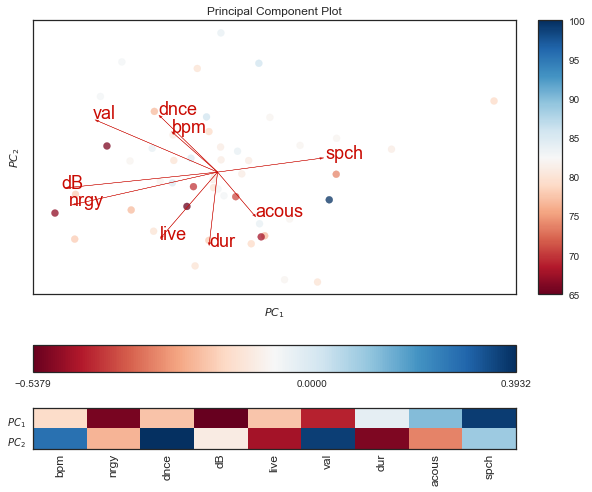

Features selected by forward sequential selection for Brazil: ['nrgy' 'dnce' 'live']


In [17]:
#Look into brazil by PCA
from yellowbrick.features import PCA
data_PCA = data[data["country"] == 'brazil']
X2 = data_PCA.drop(['title', 'artist','top genre','country','pop', 'year'], axis = 1)
y2 = data_PCA['pop']

visualizer = PCA(scale=True, proj_features=True, size=(600, 500), heatmap = True)
visualizer.fit_transform(X2, y2)
for label in visualizer.ax.texts:
    label.set_size(18)
visualizer.show()

from sklearn.feature_selection import SequentialFeatureSelector
model= LinearRegression()
features_selected = 3
k = 10
sfs = SequentialFeatureSelector(model, 
                               n_features_to_select = features_selected, 
                               direction="forward",
                               scoring='neg_mean_squared_error',
                               cv= k) 
sfs = sfs.fit(X2,y2)
feature_names= X2.columns.values
print("Features selected by forward sequential selection for Brazil: "+str(feature_names[sfs.get_support()]))


#### In these results, first principal component has large associations with nrgy, val,  dB and acous, so this component primarily measures the loudness characteristics(which is quite similar to PC1 for israel). The second component has large positive associations with dur and live, so this component primarily concerns about the pace of a song. 

#### As for the feature selection, it selects energy, dnce and live, which is different from the result of PCA. For Brazilian songs, liveliness is definitely a critical feature. Energy is also something you need to consider. 

## Key Takeaway From This Question

There are countrywise feature preferences. We could select three typical countries as examples. 

Japan represents countries where valence and loudness greatly affect the popularity of songs. 

Israel represents countries where energy greatly affects the popularity of songs. 

Brazil represents countries where energy and liveliness greatly affect the popularity of songs. 

For all countries, a song's energy is always crucial in deciding the popularity.

## Future work 

We use Feature Selection and Pricipal Component Analysis to decide what features are important in different countries. However, the result of SFS and PCA does not always correspond with each other. An important future work would be to discover the reason behind it and try other methods for feature imporance. 

# Thank you!

# References
The project has also used the Homework and Lab code solutions that have been uploaded by the professor. 

https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/
https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
https://stackoverflow.com/questions/58270129/convert-categorical-data-into-numerical-data-in-python
https://imbalanced-learn.org/stable/
https://imbalanced-learn.org/stable/auto_examples/applications/plot_multi_class_under_sampling.html#sphx-glr-auto-examples-applications-plot-multi-class-under-sampling-py
https://imbalanced-learn.org/stable/user_guide.html#user-guide
https://stackoverflow.com/questions/63864667/how-to-use-dictionary-in-smote-algorithm-for-resampling-the-multi-class-input-da
https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/introduction.html  
https://www.statsmodels.org/stable/examples/notebooks/generated/discrete_choice_overview.html https://blog.csdn.net/u010665216/article/details/78559091  
https://blog.csdn.net/dta0502/article/details/82988193  
https://www.delftstack.com/zh/howto/matplotlib/how-to-hide-axis-text-ticks-and-or-tick-labels-in-matplotlib/  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html  
https://www.scikit-yb.org/en/latest/api/features/index.html  
https://zhuanlan.zhihu.com/p/351075744  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://stats.stackexchange.com/questions/183236/what-is-the-relation-between-k-means-clustering-and-pca
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html
https://dburkhardt.github.io/tutorial/visualizing_pca/
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
https://machinelearningmastery.com/principal-component-analysis-for-visualization/
https://www.scikit-yb.org/en/latest/api/features/pca.html
https://www.scikit-yb.org/en/latest/api/index.html
https://www.scikit-yb.org/en/latest/
